In [ ]:
# !unzip "/content/drive/MyDrive/Machine learning data/store-sales-predictions/store-sales-time-series-forecasting.zip" -d "/content/drive/MyDrive/Machine learning data/store-sales-predictions/"

In [ ]:
# !pip install virtualenv

In [ ]:
# !virtualenv /content/drive/MyDrive/colab_env

In [ ]:
!source /content/drive/MyDrive/colab_env/bin/activate

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

In [ ]:
# !pip install darts --target "/content/drive/MyDrive/colab_env/lib/python3.10/site-packages"

In [ ]:
# !pip install category_encoders --target "/content/drive/MyDrive/colab_env/lib/python3.10/site-packages"

In [ ]:
# import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from math import *
%matplotlib inline

# importing machine learning related libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing dart relatted modules
# from darts import TimeSeries

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/train.csv")
df.head()
df.drop(columns = ["onpromotion"])

,id,date,store_nbr,family,sales
0,0,2013-01-01,1,AUTOMOTIVE,0.000
1,1,2013-01-01,1,BABY CARE,0.000
2,2,2013-01-01,1,BEAUTY,0.000
3,3,2013-01-01,1,BEVERAGES,0.000
4,4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553
3000885,3000885,2017-08-15,9,PRODUCE,2419.729
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000


In [ ]:
df.family.unique().size

33

In [ ]:
# checking for missing values in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [ ]:
# changing date from object type to datetime type
def change_obj2Date(df, label):
  """
  This function change df[label] to datetime object from string object
  """
  date = pd.to_datetime(df[label], format = "%Y-%m-%d", exact=True)
  df["saleYear"] = date.dt.year
  df["saleMonth"] = date.dt.month
  df["saleDay"] = date.dt.day
  df["saleDayOfWeek"] = date.dt.dayofweek
  df["saleDayOfYear"] = date.dt.dayofyear
  # df.drop(columns = ["date"], inplace = True)
  df.date = date
change_obj2Date(df, "date")
df

,id,date,store_nbr,family,sales,onpromotion,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15,1,227
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15,1,227
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15,1,227
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15,1,227


# Exploring data in store data frame using matplotlib

In [ ]:
# plt.figure(figsize = (15,5))
# plt.plot(df[(df.family == "SEAFOOD") & (df.date < "2013-06-01") & (df.store_nbr == 1)].date,df[(df.family == "SEAFOOD") & (df.date < "2013-06-01") & (df.store_nbr == 1)].sales);
df[(df.family == "BEAUTY") & (df.date < "2014-01-01") & (df.store_nbr == 4)]

,id,date,store_nbr,family,sales,onpromotion,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
1091,1091,2013-01-01,4,BEAUTY,0.0,0,2013,1,1,1,1
2873,2873,2013-01-02,4,BEAUTY,7.0,0,2013,1,2,2,2
4655,4655,2013-01-03,4,BEAUTY,1.0,0,2013,1,3,3,3
6437,6437,2013-01-04,4,BEAUTY,1.0,0,2013,1,4,4,4
8219,8219,2013-01-05,4,BEAUTY,4.0,0,2013,1,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
640829,640829,2013-12-27,4,BEAUTY,4.0,0,2013,12,27,4,361
642611,642611,2013-12-28,4,BEAUTY,2.0,0,2013,12,28,5,362
644393,644393,2013-12-29,4,BEAUTY,3.0,0,2013,12,29,6,363
646175,646175,2013-12-30,4,BEAUTY,4.0,0,2013,12,30,0,364


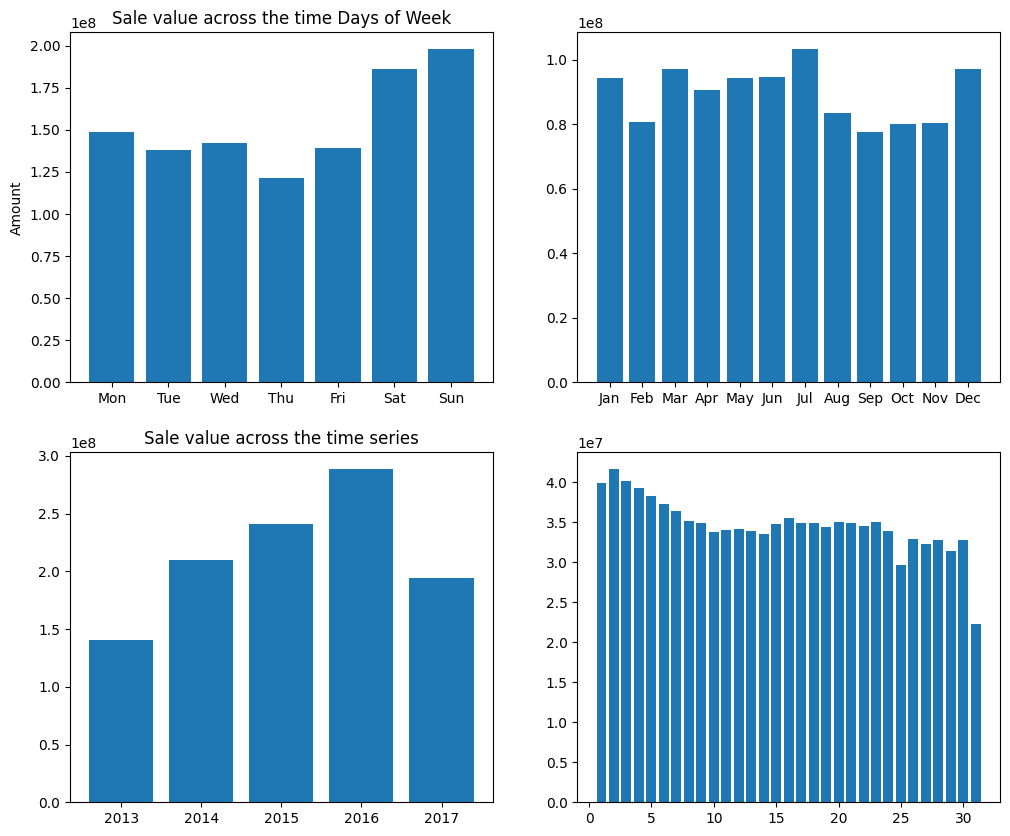

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))
ax[0,0].bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], df.groupby(df.saleDayOfWeek).sales.sum())
ax[0,1].bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], df.groupby(df.saleMonth).sales.sum())
ax[1,0].bar(df.saleYear.unique(), df.groupby(df.saleYear).sales.sum())
ax[1,1].bar(df.saleDay.unique(), df.groupby(df.saleDay).sales.sum())
ax[0,0].set(title ="Sale value across the time Days of Week",
            ylabel = "Amount")
ax[1,0].set(title = "Sale value across the time series");
# plt.ylabel("Amount")
# plt.xlabel("Dates");


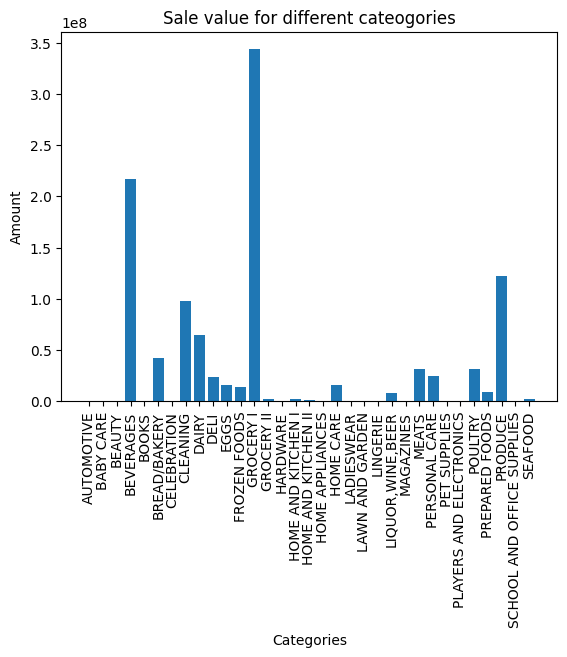

In [ ]:
family = df.family.unique()
family_sales = []
df.groupby(df.family).apply(lambda x: family_sales.append(x.sales.sum()))
plt.bar(family, family_sales)
plt.title("Sale value for different cateogories")
plt.ylabel("Amount")
plt.xlabel("Categories")
plt.xticks(rotation = 90);

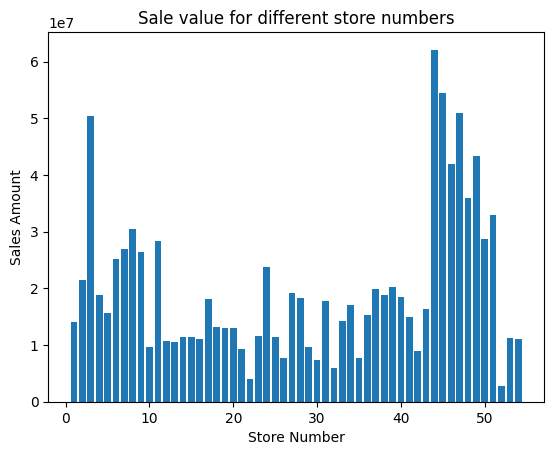

In [ ]:
store = []
store_sales = []
df.groupby(df.store_nbr).apply(lambda x: (store.append(x.store_nbr.iloc[0]), store_sales.append(x.sales.sum())))
plt.title("Sale value for different store numbers")
plt.ylabel("Sales Amount")
plt.xlabel("Store Number")
plt.bar(store, store_sales);

# Lets add store details in sales data frame

In [ ]:
stores = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/stores.csv")
stores_dict = {x.store_nbr:[x.city, x.type, x.cluster, x.state] for _,x in stores.iterrows()}
def concat_stores(stores_dict, df):
  stores_frame = pd.DataFrame({"city":[stores_dict[c][0] for c in df.store_nbr],
                              "group":[stores_dict[g][1] for g in df.store_nbr],
                              "cluster":[stores_dict[cl][2] for cl in df.store_nbr],
                               "state":[stores_dict[s][3] for s in df.store_nbr]})
  return pd.concat([df,stores_frame], axis=1)
df = concat_stores(stores_dict, df)

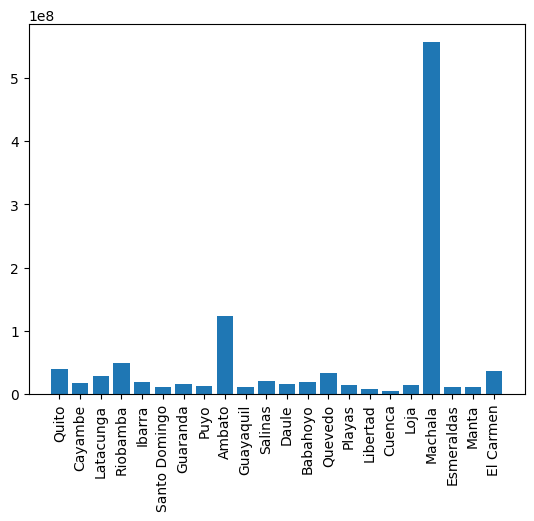

In [ ]:
plt.bar(df.city.unique(), df.groupby(df.city).sales.sum())
plt.xticks(rotation = 90);

# Lets add holiday column in our sales Data Frame

In [ ]:
holiday = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/holidays_events.csv")
holi_dict = {}
for _, x in holiday.iterrows():
  holi_dict[x.date] = [x.type, x.locale, x.locale_name]
type_dict = {y:x+1 for x,y in enumerate(holiday.type.unique())}
holi_list = []
stores
x = 0
def add_holiday(row):
  if row.date in holi_dict:
    if holi_dict[row.date][1] == "Local" and holi_dict[row.date][2] == row.city: holi_list.append(type_dict[holi_dict[row.date][0]])
    elif holi_dict[row.date][1] == "Regional" and holi_dict[row.date][2] == row.state: holi_list.append(type_dict[holi_dict[row.date][0]])
    elif holi_dict[row.date][1] == "National": holi_list.append(type_dict[holi_dict[row.date][0]])
    else: holi_list.append(0)
  else: holi_list.append(0)
df.apply(add_holiday, axis=1)
holi_list
# df.drop(columns = ["date"], inplace = True)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
holi_frame = pd.DataFrame({"holiday":holi_list})
df = pd.concat([df,holi_frame], axis = 1)

<BarContainer object of 17 artists>

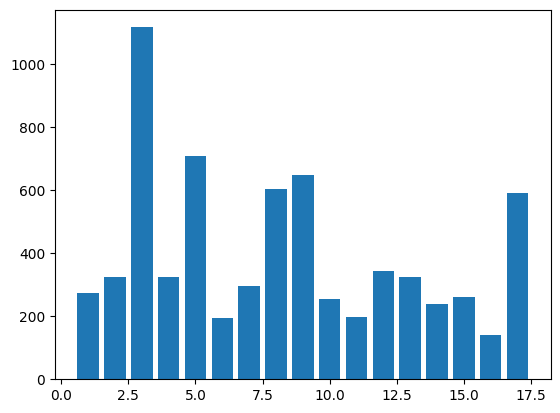

In [ ]:
plt.bar(df.cluster.unique(), df.groupby(df.cluster).sales.mean())

In [ ]:
type_dict

{'Holiday': 1,
 'Transfer': 2,
 'Additional': 3,
 'Bridge': 4,
 'Work Day': 5,
 'Event': 6}

In [ ]:
# holi_frame.to_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/holidayFrame.csv")

In [ ]:
def convert_cat2num(df):
  for label, content in df.items():
    if content.dtype == "object":
      df[label] = content.astype("category").cat.as_ordered()
      df[label] = df[label].cat.codes
convert_cat2num(df)
df

,id,date,store_nbr,family,sales,onpromotion,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,city,group,cluster,state,holiday
0,0,2013-01-01,1,0,0.000,0,2013,1,1,1,1,18,3,13,12,0
1,1,2013-01-01,1,1,0.000,0,2013,1,1,1,1,18,3,13,12,0
2,2,2013-01-01,1,2,0.000,0,2013,1,1,1,1,18,3,13,12,0
3,3,2013-01-01,1,3,0.000,0,2013,1,1,1,1,18,3,13,12,0
4,4,2013-01-01,1,4,0.000,0,2013,1,1,1,1,18,3,13,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,2017,8,15,1,227,18,1,6,12,0
3000884,3000884,2017-08-15,9,29,154.553,1,2017,8,15,1,227,18,1,6,12,0
3000885,3000885,2017-08-15,9,30,2419.729,148,2017,8,15,1,227,18,1,6,12,0
3000886,3000886,2017-08-15,9,31,121.000,8,2017,8,15,1,227,18,1,6,12,0


In [ ]:
def convert_cat2bin(df):
  encoder = ce.BinaryEncoder(cols=["store_nbr","family"])
  df = encoder.fit_transform(df)
  return df
# df = convert_cat2bin(df)
# df

# Different Models
## Trying RandomForestRegressor()

In [ ]:
df = df.sample(frac = 1)
X = df.drop(columns=["sales", "id","state"])
y = df.sales
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators=10, verbose=3,n_jobs = -1)
np.random.seed(23)
reg.fit(X_train,y_train)
y_preds = reg.predict(X_test)
rmsle = sqrt(mean_squared_log_error(y_test, y_preds))
rmsle
# score around 0.456

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Int64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int8DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int8DType'>, <class 'numpy.dtypes.Int8DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

## Trying svm regressor

In [ ]:
# svm_reg = SVR(verbose= True)
# svm_reg.fit(X_train, y_train)
# y_preds = svm_reg.predict(X_test)
# sqrt(mean_squared_log_error(y_test, y_preds))
# svm working well only in training data

##Trying SGD Regressor

In [ ]:
sgd_reg = SGDRegressor(loss = 'huber', penalty = "l1", alpha = 0.001, learning_rate = "constant", verbose = 4)
# sgd_reg.fit(X_train, y_train)
# y_preds = sgd_reg.predict(X_test)
# y_preds
# sqrt(mean_squared_log_error(y_test, y_preds))
# sgd not performing well

## Trying KNN Regressor

In [ ]:
# knn_reg = KNeighborsRegressor(n_jobs = -1)
# knn_reg.fit(X_train, y_train)
# y_preds = knn_reg.predict(X_test)
# # y_preds
# sqrt(mean_squared_log_error(y_test, y_preds))

In [ ]:
for ind,val in enumerate(y_preds):
  if val < 0:
    y_preds[ind] = 0

sqrt(mean_squared_log_error(y_test, y_preds))

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/test.csv")
change_obj2Date(test_df, "date")
test_df = concat_stores(stores_dict, test_df)
test_df.apply()
convert_cat2num(test_df)
test_df
test_df.drop(columns = ["id", "date"], inplace = True)


In [ ]:
y_pred = reg.predict(test_df)
y_pred.shape

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/test.csv")

In [ ]:
output = pd.DataFrame({"id": test_df.id, "sales":y_pred})
output

In [ ]:
output.to_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/output6.csv",index=False)

In [ ]:
param_grid = {
    "n_estimators":[10,50,100],
    "max_depth": [None, 10, 20,40],
    "max_leaf_nodes":[None, 20, 15]
}

In [ ]:
model = GridSearchCV(RandomForestRegressor(verbose = 3), param_grid=param_grid, scoring="neg_mean_squared_log_error",verbose = 1, cv =2)
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
# y_preds = model.predict(X_test)

In [ ]:
# sqrt(mean_squared_log_error(y_test, y_preds))

In [ ]:
# model.best_params_

# Exploring Stores related meta data.
It is direclty connected to the store column of our primary store sales dataframe

In [ ]:
stores_meta = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/stores.csv")
stores_meta.head()

In [ ]:
stores_meta.state.unique().size

In [ ]:
encoder = ce.BinaryEncoder(cols=["city","state", "type"])
bin_city = encoder.fit_transform(stores_meta)
bin_city.head()

In [ ]:
# encoder.mapping

In [ ]:
holiday_data = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/holidays_events.csv")
holiday_data.head()

In [ ]:
oil_data = pd.read_csv("/content/drive/MyDrive/Machine learning data/store-sales-predictions/oil.csv")
oil_data.head()

In [ ]:
oil_data.info()